In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
list_of_files = glob.glob('./*.csv')

In [3]:
data_df = pd.DataFrame()
for file in list_of_files:
    tmp_df = pd.read_csv(file)
    tmp_df['type'] = file[10:-19]
    data_df=pd.concat([data_df, tmp_df], axis=0, sort=True)

[Text(0.5, 0, 'Number of Rows in DataFrame')]

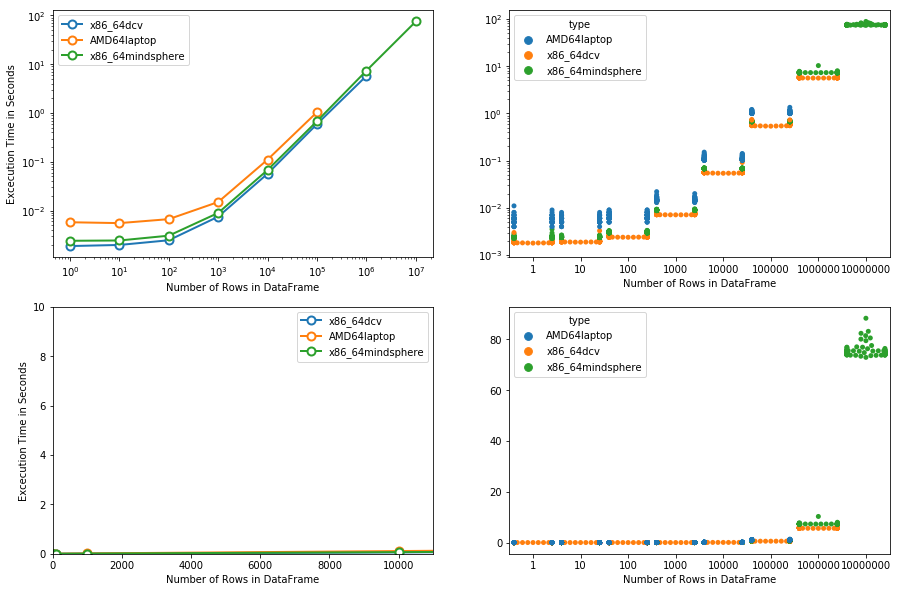

In [20]:
data_grp = data_df.groupby(['dfRowCount', 'type']).mean()

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

for typp in set(data_grp.index.get_level_values(1)):
    data_grp.xs(typp, level=1, drop_level=False)
    xx = (data_grp.xs(typp, level=1, drop_level=False).index.get_level_values(0).values)
    yy = (data_grp.xs(typp, level=1, drop_level=False)['execution time'].values)
    ax1.plot(xx,yy,'o-',label=typp, marker='o',markerfacecolor='white', markeredgewidth=2,markersize=8,  linewidth=2)

ax1.set_xscale('log')    
ax1.set_yscale('log')
ax1.set(xlabel='Number of Rows in DataFrame')
ax1.set(ylabel='Excecution Time in Seconds')
ax1.legend()

sns.swarmplot(x='dfRowCount',y='execution time', data=data_df, ax=ax2, hue='type')
ax2.set_yscale("log") # log first
ax2.set_ylabel('')
ax2.set(xlabel='Number of Rows in DataFrame')

for typp in set(data_grp.index.get_level_values(1)):
    data_grp.xs(typp, level=1, drop_level=False)
    xx = (data_grp.xs(typp, level=1, drop_level=False).index.get_level_values(0).values)
    yy = (data_grp.xs(typp, level=1, drop_level=False)['execution time'].values)
    ax3.plot(xx,yy,'o-',label=typp, marker='o',markerfacecolor='white', markeredgewidth=2,markersize=8,  linewidth=2)

ax3.set(xlabel='Number of Rows in DataFrame')
ax3.set(ylabel='Excecution Time in Seconds')
ax3.set_xlim(0,11000)
ax3.set_ylim(0,0.1)
ax3.legend()

sns.swarmplot(x='dfRowCount',y='execution time', data=data_df, ax=ax4, hue='type')
ax4.set_ylabel('')
ax4.set(xlabel='Number of Rows in DataFrame')

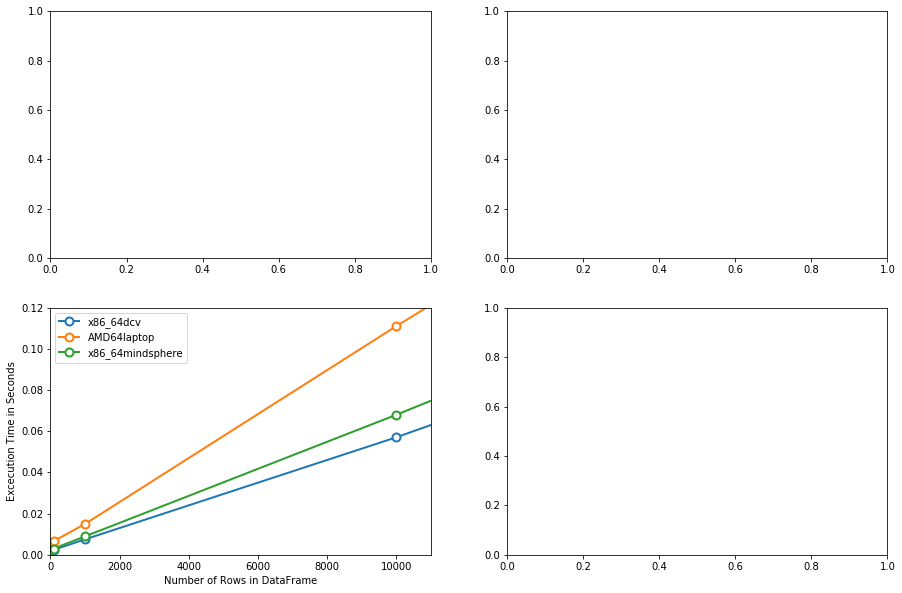

In [23]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
for typp in set(data_grp.index.get_level_values(1)):
    data_grp.xs(typp, level=1, drop_level=False)
    xx = (data_grp.xs(typp, level=1, drop_level=False).index.get_level_values(0).values)
    yy = (data_grp.xs(typp, level=1, drop_level=False)['execution time'].values)
    ax3.plot(xx,yy,'o-',label=typp, marker='o',markerfacecolor='white', markeredgewidth=2,markersize=8,  linewidth=2)

ax3.set(xlabel='Number of Rows in DataFrame')
ax3.set(ylabel='Excecution Time in Seconds')
ax3.set_xlim(0,11000)
ax3.set_ylim(0,0.12)
ax3.legend()